In [6]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier
import pandas
# import numpy as np
# from time import time
from scipy.stats import randint as sp_randint
# from sklearn.model_selection import RandomizedSearchCV

#读取数据
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
kdd_data_10percent = pandas.read_csv("E:\Pycharm\Intrusion_Detection\kddcup.data_10_percent.csv", header=None, names = col_names)
kdd_data_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# kdd_data_10percent.head()

In [8]:
# kdd_data_10percent["protocol_type"].value_counts()

In [9]:
# kdd_data_10percent["service"].value_counts()

In [10]:
# kdd_data_10percent["flag"].value_counts()
kdd_data_10percent["label"].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [11]:
#数据预处理：1.随机抽样
X_sample=kdd_data_10percent.sample(10000)
X_sample["label"].value_counts()
num_features = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
X_raw=X_sample[num_features].astype(float)
X_sample.loc[X_sample["label"]!='normal.',"label"]='1' #必须先写!=，若先写==，则之后全部都变成0，就都满足!="normal.",全部变成1
X_sample.loc[X_sample["label"]=='normal.',"label"]='0'
print(X_sample["label"].value_counts())

1    8138
0    1862
Name: label, dtype: int64


In [12]:
#数据预处理：2.归一化
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler=MinMaxScaler()
X_Scale=MinMaxScaler.fit_transform(X_raw)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
#建立模型
alg_1 = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=4, min_samples_leaf=2)
#模型评估
# kf = KFold(n_splits=10, random_state=1) #指定KFold参数
scores = cross_val_score(alg_1, X_Scale, X_sample["label"], cv=10)
print(scores.mean())

0.9991998995


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
alg_2 = LogisticRegression(random_state=1)
scores = cross_val_score(alg_2, X_Scale, X_sample["label"], cv=3)
print(scores.mean())

0.989300219188


In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
alg_3 = XGBClassifier()
scores = cross_val_score(alg_3, X_Scale, X_sample["label"], cv=3)
print(scores.mean())

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.998999959912


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

alg_5=GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3)
scores = cross_val_score(alg_5, X_Scale, X_sample["label"], cv=3)
print(scores.mean())

0.997200139804


C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 3  5 10 11 14 16 17] are constant.
  UserWarning)


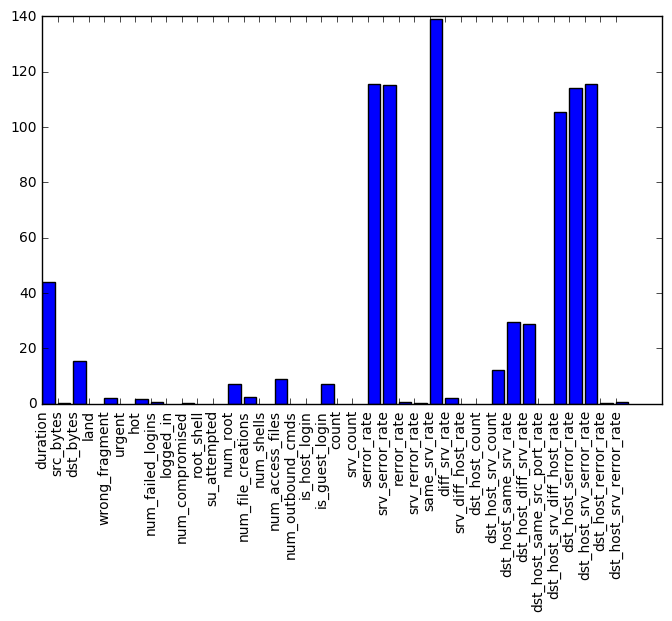

In [20]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
num_features = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]

# Perform feature selection
selector = SelectKBest(f_classif)
selector.fit(X_Scale, X_sample["label"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.figure(figsize=(8,5))
plt.bar(range(len(num_features)), scores)
plt.xticks(range(len(num_features)), num_features, rotation='vertical')
plt.show()

In [142]:
# from xgboost import  XGBClassifier
# from xgboost import  plot_importance
# import matplotlib.pyplot as plt
# alg_4=XGBClassifier()
# alg_4.fit(X_Scale, X_sample["label"])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [143]:
# def feat_imp(df, model, n_features):
# 
#     d = dict(zip(df.columns, model.feature_importances_))
#     ss = sorted(d, key=d.get, reverse=True)
#     top_names = ss[0:n_features]
# 
#     plt.figure(figsize=(15,15))
#     plt.title("Feature importances")
#     plt.bar(range(n_features), [d[i] for i in top_names], color="r", align="center")
#     plt.xlim(-1, n_features)
#     plt.xticks(range(n_features), top_names, rotation='vertical')
#     plt.show()

In [145]:
# feat_imp(kdd_data_10percent[num_features], alg_4, 38)

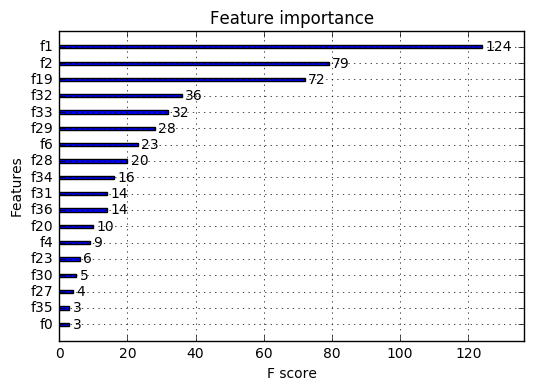

In [148]:
# plot_importance(alg_4)
# plt.show()